<a href="https://colab.research.google.com/github/Zuhair0000/MAGIC/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)

# magic.columns = cols


In [3]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df['class'] = (df['class'] == 'g').astype(int)

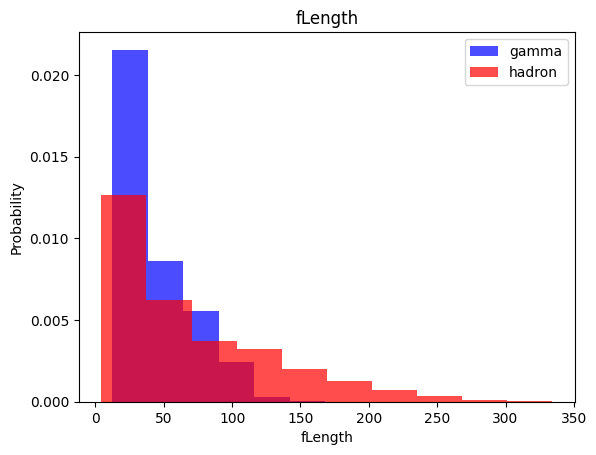

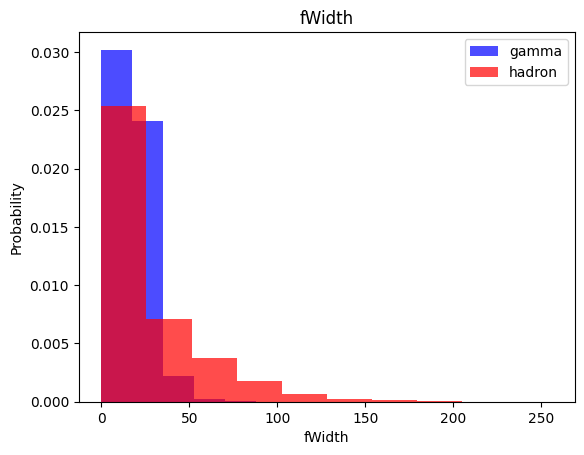

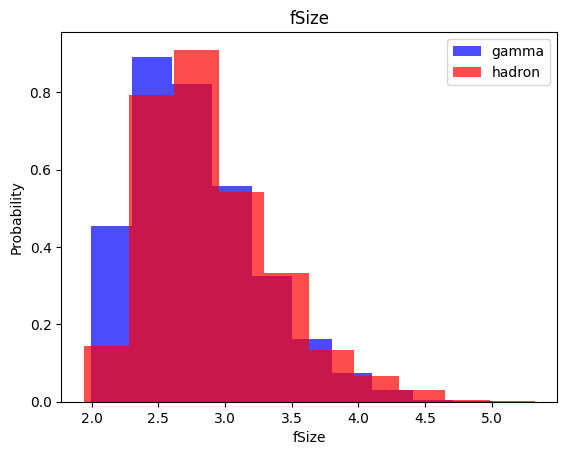

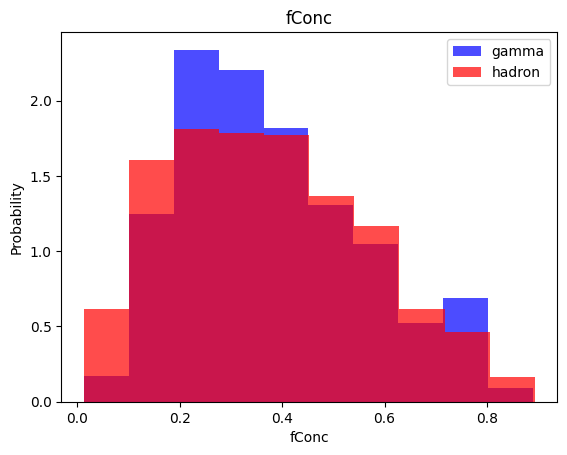

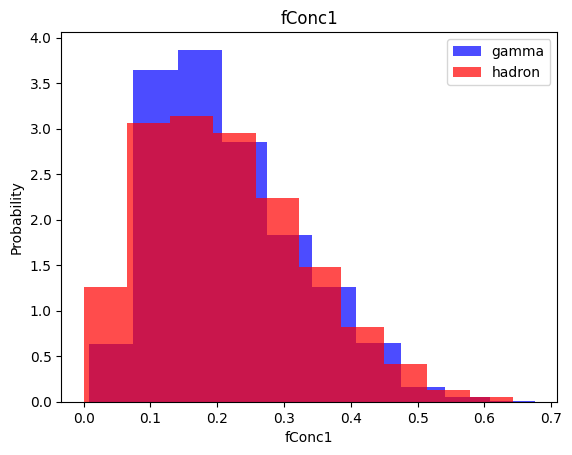

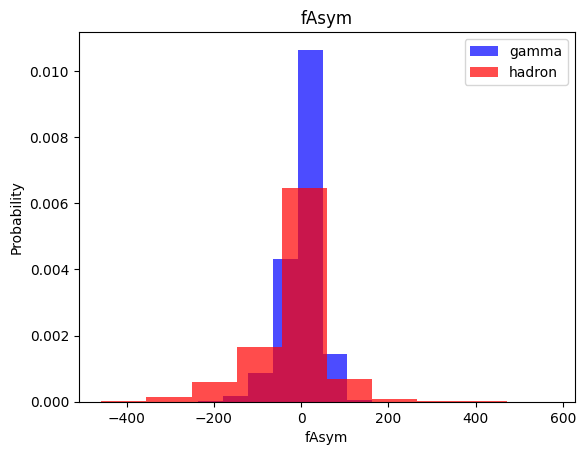

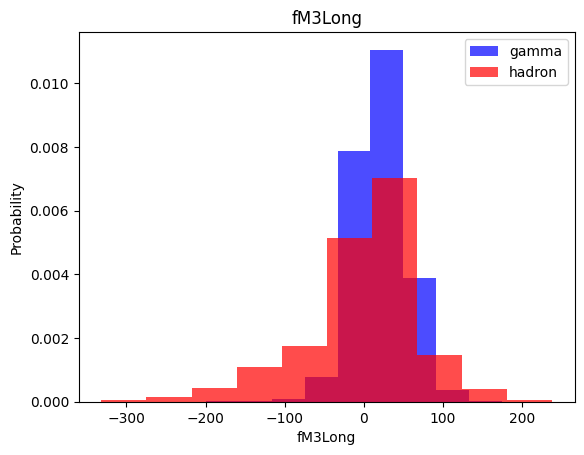

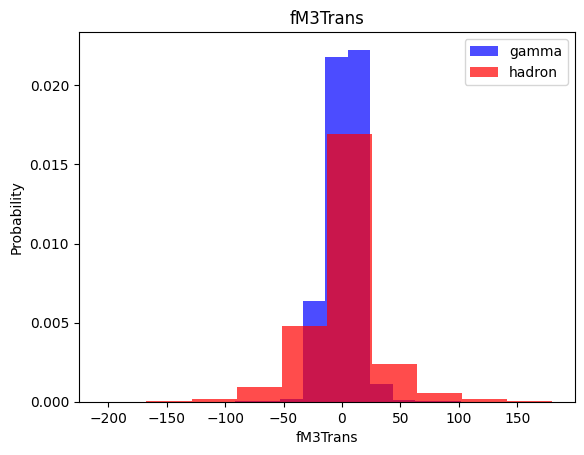

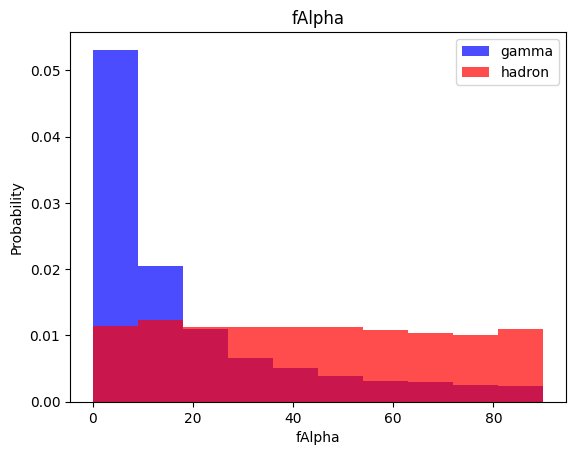

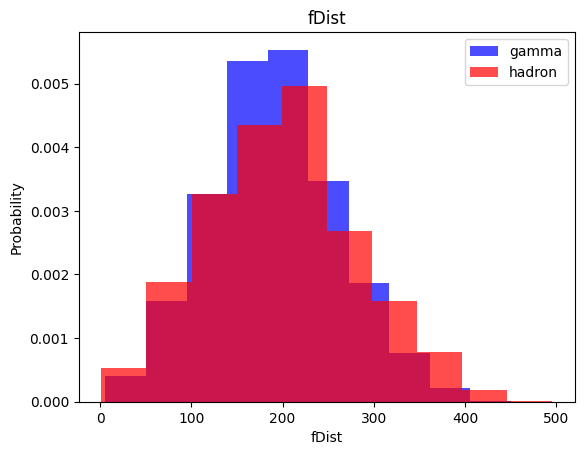

In [5]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe.loc[:, dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y=ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [8]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

### **KNN**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
X = [[150, 1], [170, 1], [140, 0], [130, 0]]
# Labels: Apple or Orange
y = ["Apple", "Apple", "Orange", "Orange"]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)
prediction = knn.predict([[160, 0]])
print("Predicted Fruit:", prediction[0])

Predicted Fruit: Apple


In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = knn_model.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1333
           1       0.84      0.89      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.82      0.82      0.82      3804



### ***Naive Bayes***

In [14]:
from sklearn.naive_bayes import GaussianNB


In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)


In [16]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1333
           1       0.74      0.89      0.81      2471

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



### **Log Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [19]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1333
           1       0.85      0.82      0.84      2471

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



### **SVM**

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()

In [22]:
svm_model = svm_model.fit(x_train, y_train)

In [23]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1333
           1       0.89      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### **Neural Net**

In [67]:
import tensorflow as tf

In [25]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)


  plt.show()



In [28]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10, )),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
  return nn_model, history

In [29]:
model, history = train_model(x_train, y_train, 32, 0.2, 0.001, 32, 100)


# least_val_loss = float('inf')
# least_loss_model = None

# epochs=100
# for num_nodes in [16, 32, 64]:
#   for dropout_prob in [0, 0.2]:
#     for lr in [0.01, 0.005, 0.001]:
#       for batch_size in [32, 64, 128]:
#         print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
#         model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
#         plot_history(history)
#         val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0]
#         if val_loss < least_val_loss:
#           least_val_loss = val_loss
#           least_loss_model = model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


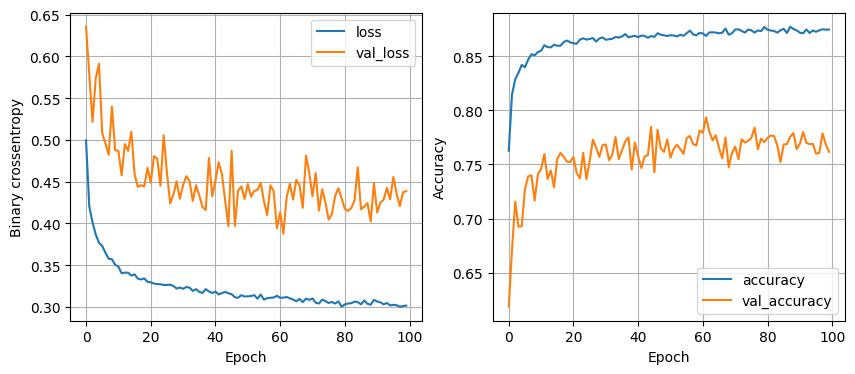

In [33]:
plot_history(history)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1333
           1       0.89      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



### **Linear Regression**

In [35]:
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [57]:
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibilty', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df = pd.read_csv("SeoulBikeData.csv").drop(['Date', 'Holiday', 'Seasons'], axis=1)
df.columns = dataset_cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df.drop(['hour', 'wind', 'visibilty', 'functional'], axis=1)

In [58]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


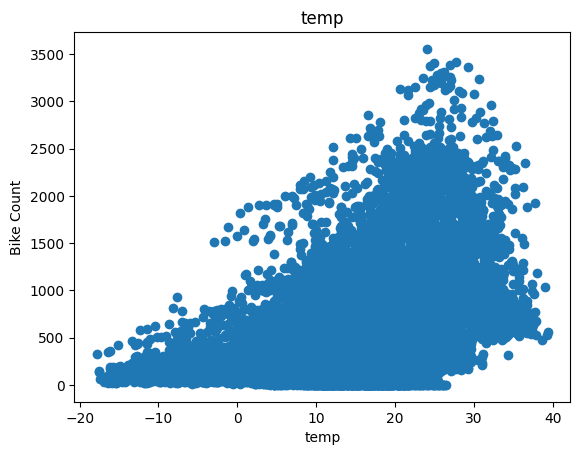

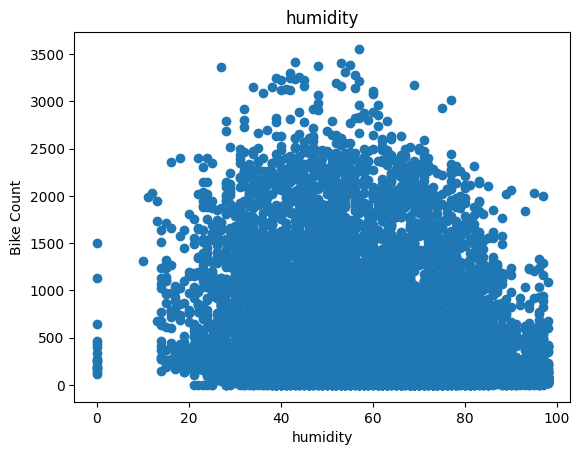

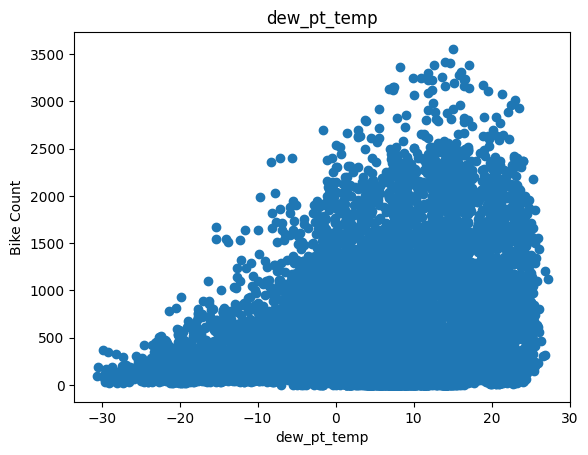

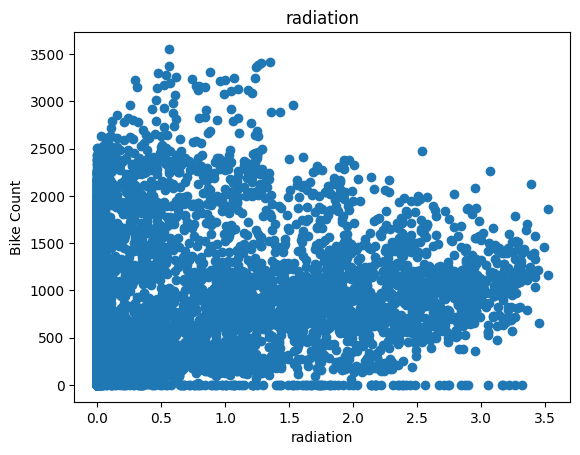

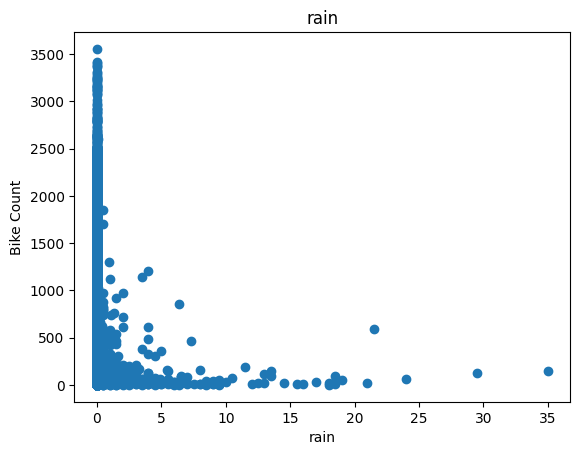

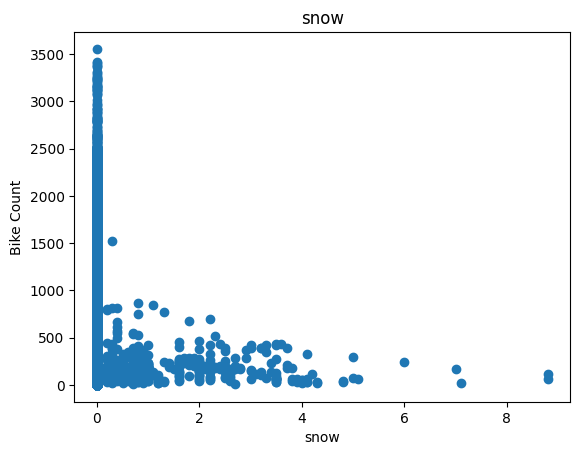

In [59]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_count'])
  plt.title(label)
  plt.ylabel("Bike Count")
  plt.xlabel(label)
  plt.show()

In [73]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))

  return data, x, y

In [86]:
_, x_train, y_train = get_xy(train, 'bike_count', x_labels=['temp'])
_, x_val, y_val = get_xy(val, 'bike_count', x_labels=['temp'])
_, x_test, y_test = get_xy(test, 'bike_count', x_labels=['temp'])

In [65]:
temp_reg = LinearRegression()
temp_reg.fit(x_train, y_train)

LinearRegression()

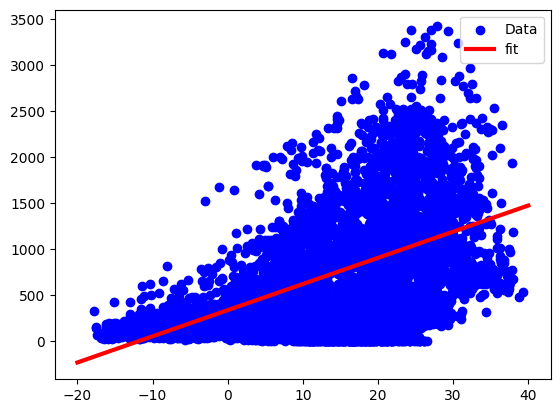

In [69]:
plt.scatter(x_train, y_train, label="Data", color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label='fit', color='red', linewidth=3)
plt.legend()
plt.show()

In [74]:
_, x_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, 'bike_count', x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

In [75]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

### **Regression with Neural Net**

In [114]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train.reshape(-1, 1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [116]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [117]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (5256, 1)
y_train: (5256,)
x_val: (1752, 1)
y_val: (1752,)


In [118]:
# Features should be 2D
x_train = x_train.reshape(-1, 1)
x_val   = x_val.reshape(-1, 1)

# Targets should be 1D
y_train = y_train.reshape(-1)
y_val   = y_val.reshape(-1)

In [119]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (5256, 1)
y_train: (5256,)
x_val: (1752, 1)
y_val: (1752,)


In [120]:


history = temp_nn_model.fit(x_train, y_train,
                            verbose=0,
                            epochs=1000,
                            validation_data=(x_val, y_val)
                            )

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


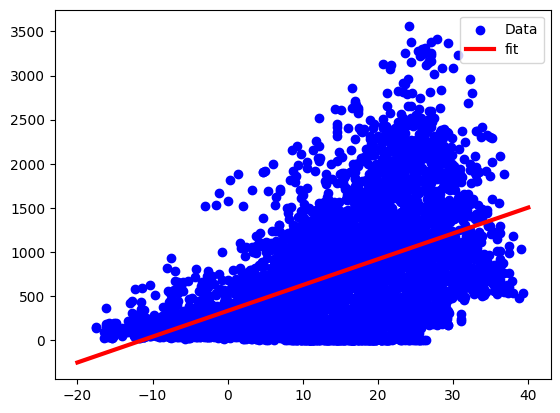

In [121]:
plt.scatter(x_train, y_train, label="Data", color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='fit', color='red', linewidth=3)
plt.legend()
plt.show()